In [1]:
include("../src/simulations.jl")
using Plots, Statistics

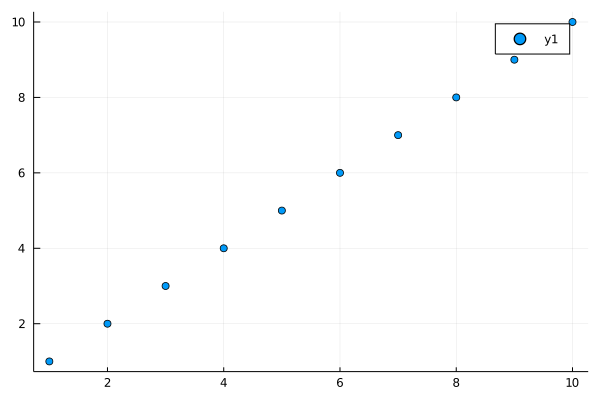

In [2]:
scatter(1:10)

In [3]:
function lsimulation(lvals,iter::Integer,angmax::Real=pi/20,angmin::Real=-pi/20)
    n = length(lvals)-1
    rmsds_mean = zeros(n+1)
    rmsds_error = zeros(n+1)
    for (ind,l) in enumerate(lvals)
        temp_rmsds = zeros(iter)
        println(ind)
        for j in 1:iter
            P = stair(5)
            Q = knittingneedle(l)
            lastQ, angles, diheds = randomSearch(P,Q,1e-5,angmax,angmin,max_iter=10000)
            temp_rmsds[j] = overlapedRmsd(P,lastQ)
        end
        rmsds_mean[ind] = Statistics.mean(temp_rmsds)
        rmsds_error[ind] = Statistics.std(temp_rmsds)
    end
    return lvals,rmsds_mean,rmsds_error
end

lsimulation (generic function with 6 methods)

In [ ]:
p = plot()
lvals,rmsds_mean,rmsds_error = lsimulation(LinRange(1.35,1.45,51),10)
scatter!(lvals,rmsds_mean,yerror=rmsds_error,ylabel="RMSD sobrepuesto",xlabel="L",label=false)

In [ ]:
plotlyjs()

In [ ]:
include("../src/test.jl")

In [ ]:
p = plot()
plotChain!(lastQ,"lightblue")
p